# How to use custom fonts in `Matplotlib`

Code for the following Medium article: [link](https://medium.com/gitconnected/how-to-use-custom-fonts-in-matplotlib-plots-d8450b929e76)

## Imports

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams, rcdefaults

## Display system fonts

### Just the names

These are the names of all the fonts that were found in the system.

In [2]:
sorted(font_manager.get_font_names())

['Abyssinica SIL',
 'Andale Mono',
 'Ani',
 'AnjaliOldLipi',
 'Arial',
 'Arial Black',
 'Chandas',
 'Chilanka',
 'Comic Sans MS',
 'Courier New',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Droid Sans Fallback',
 'Dyuthi',
 'FreeMono',
 'FreeSans',
 'FreeSerif',
 'Gargi',
 'Garuda',
 'Georgia',
 'Gubbi',
 'Impact',
 'Jamrul',
 'KacstArt',
 'KacstBook',
 'KacstDecorative',
 'KacstDigital',
 'KacstFarsi',
 'KacstLetter',
 'KacstNaskh',
 'KacstOffice',
 'KacstOne',
 'KacstPen',
 'KacstPoster',
 'KacstQurn',
 'KacstScreen',
 'KacstTitle',
 'KacstTitleL',
 'Kalapi',
 'Kalimati',
 'Karumbi',
 'Keraleeyam',
 'Khmer OS',
 'Khmer OS System',
 'Kinnari',
 'LKLUG',
 'Laksaman',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Likhan',
 'Lohit Assamese',
 'Lohit Bengali',
 'Lohit Devanagari',
 'Lohit Gujarati',
 'Lohit Gurmukhi',
 'Lohit Kannada',
 'Lohit Malayalam',
 'Lohit Odia',
 'Lohit Tamil',

### Check the number of all available fonts

These are the fonts that matplotli currently see and you can use them in the plots.

In [3]:
# Fonts visible to `matplotlib` at the moment
len(font_manager.get_font_names())

132

In [4]:
# This is a system font so it should be available
"Arial" in font_manager.get_font_names()

True

In [5]:
# We haven't installed it yet so it shouldn't be available
"Rubik" in font_manager.get_font_names()

False

## Install new font

I've downloaded and installed the `Rubik` font from Google fonts:  
https://fonts.google.com/specimen/Rubik?query=rubik

## Find all available fonts in the system

Some fonts are available in many styles such as: bold, italic, etc.

These are the fonts that are installed in our system but matplotlib cannot see them yet.

We need to make matplotlib see them.

In [6]:
sorted(font_manager.findSystemFonts(fontpaths=None, fontext="ttf"))

['/home/pawjast/.local/share/fonts/DancingScript-VariableFont_wght.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Black.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Black_Italic.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Bold.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Bold_Italic.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Italic.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Light.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Light_Italic.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Medium.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Medium_Italic.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Regular.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType/Roboto/Roboto_Thin.ttf',
 '/home/pawjast/.local/share/fonts/Google/TrueType

The count of all the font files that were found in the system, including various styles of the same font.

In [7]:

len(font_manager.findSystemFonts(fontpaths=None, fontext="ttf"))

407

## Add Paths of all system fonts to the `font_manager`.

This will make Matplotlib aware of the fonts and you'll be able to use them.

We need to add all the font files that we've found to the `font_manager`.

In [8]:
# Fonts visible to `matplotlib` at the moment
len(font_manager.get_font_names())

132

In [9]:
for font in font_manager.findSystemFonts(fontpaths=None, fontext="ttf"):
    try:
        font_manager.fontManager.addfont(font)
    except:
        print(f"Problem with the: {font}")

Problem with the: /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf


In [10]:
# Fonts visible to `matplotlib` after  adding additional fonts from the system
len(font_manager.get_font_names())

180

The number of available fonts has increased from 132 to 180.

## Check if our newly installed font is available for `matplotlib`

In [11]:
"Rubik" in font_manager.get_font_names()

True

## Plot: use new font - direct method

See `fontfamily` property of text:  
https://matplotlib.org/stable/api/text_api.html#module-matplotlib.text

As you can see below, there are 3 `keywords`/`properties` to use a new font inside a text object:
* `fontname`
* `fontfamily`
* `family`

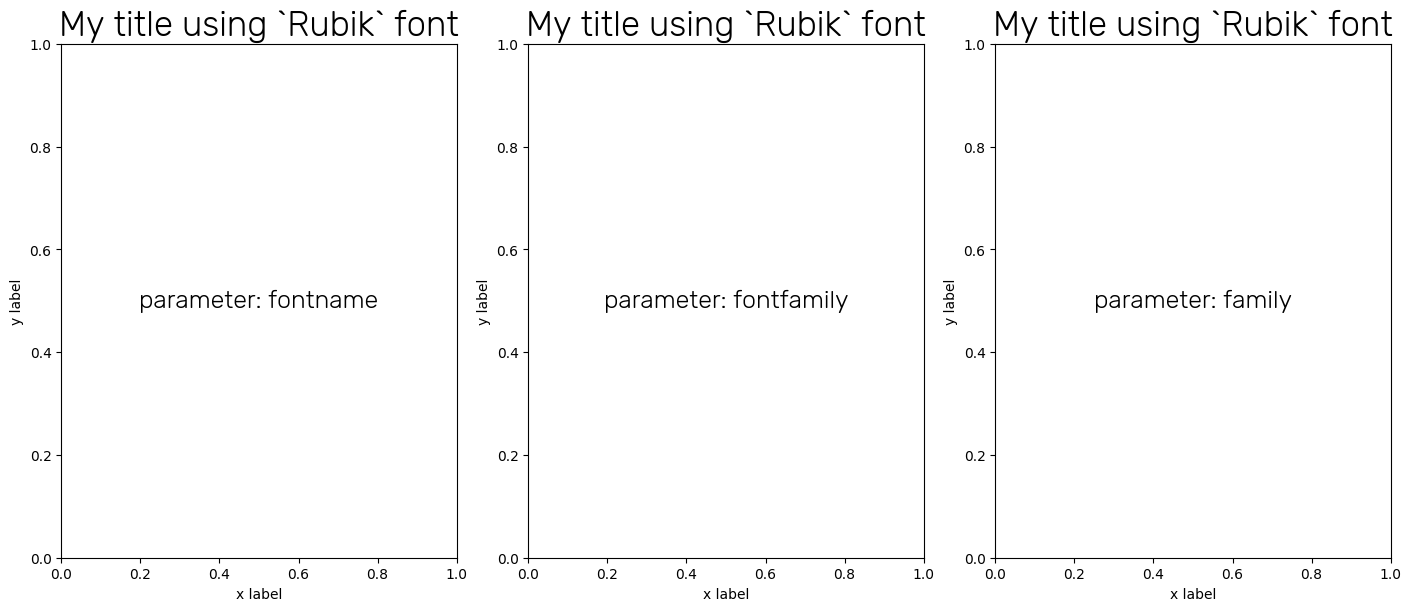

In [12]:
fig, axs = plt.subplots(
    1, 3,
    figsize=(14, 6),
    layout="constrained"
)

axs[0].set_title(
    "My title using `Rubik` font",
    fontname="Rubik",  # Using 1st keyword
    fontsize=25
)
axs[0].text(
    0.5, 0.5,
    "parameter: fontname",
    fontname="Rubik",  # Using 1st keyword
    fontsize=18,
    ha="center",
    va="center"
)
axs[1].set_title(
    "My title using `Rubik` font",
    fontfamily="Rubik",  # Using 2nd keyword
    fontsize=25
)
axs[1].text(
    0.5, 0.5,
    "parameter: fontfamily",
    fontfamily="Rubik",  # Using 2nd keyword
    fontsize=18,
    ha="center",
    va="center"
)
axs[2].set_title(
    "My title using `Rubik` font",
    family="Rubik",  # Using 3rd keyword
    fontsize=25
)
axs[2].text(
    0.5, 0.5,
    "parameter: family",
    family="Rubik",  # Using 3rd keyword
    fontsize=18,
    ha="center",
    va="center"
)

for ax in axs:
    ax.set_xlabel("x label")
    ax.set_ylabel("y label")

## Plot: use new font - `rcParams` 

In [13]:
rcParams["font.family"] = "Rubik"

Text(0, 0.5, 'y label')

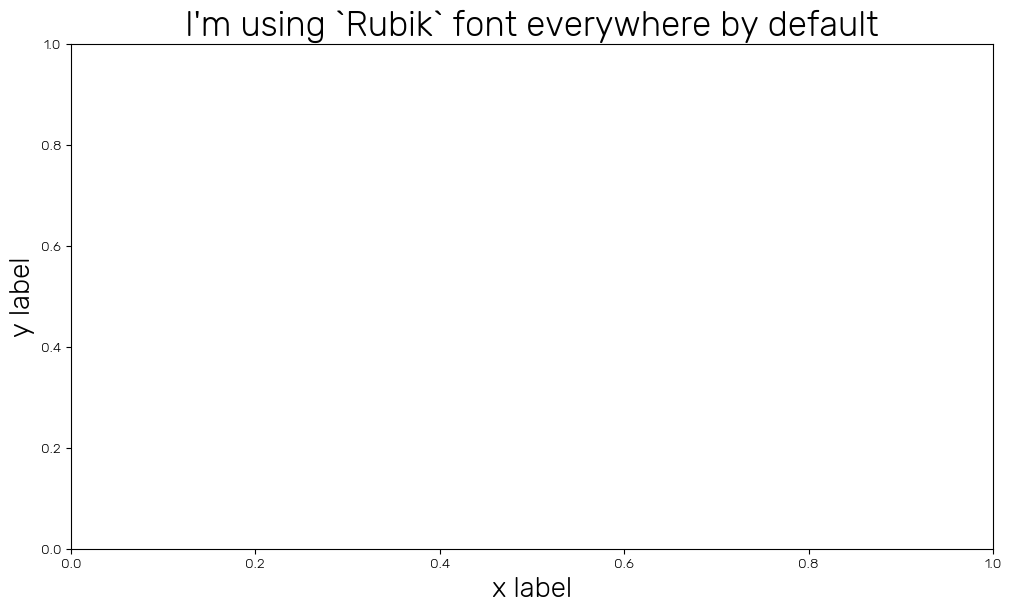

In [14]:
fig, ax = plt.subplots(
    figsize=(10, 6),
    layout="constrained"
)

ax.set_title(
    "I'm using `Rubik` font everywhere by default",
    fontsize=25
)
ax.set_xlabel(
    "x label",
    fontsize=20
)
ax.set_ylabel(
    "y label",
    fontsize=20
)

## Use fonts that aren't installed

### Specify folder to fonts

In [15]:
my_path = Path('./fonts')
my_path

PosixPath('fonts')

In [16]:
# Show all font files
# all_paths = list()
# for p in my_path.rglob("*.ttf"):
#     print(p)
#     all_paths.append(p)

In [17]:
# Show all subfolders inside `fonts`
all_fonts = [x for x in my_path.iterdir() if x.is_dir()]
all_fonts

[PosixPath('fonts/Pixelify_Sans'),
 PosixPath('fonts/Fascinate_Inline'),
 PosixPath('fonts/Dancing_Script')]

In [18]:
all_not_installed = sorted(font_manager.findSystemFonts(fontpaths=all_fonts, fontext='ttf'))
all_not_installed

['/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Dancing_Script/DancingScript-VariableFont_wght.ttf',
 '/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Dancing_Script/static/DancingScript-Bold.ttf',
 '/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Dancing_Script/static/DancingScript-Medium.ttf',
 '/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Dancing_Script/static/DancingScript-Regular.ttf',
 '/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Dancing_Script/static/DancingScript-SemiBold.ttf',
 '/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Fascinate_Inline/FascinateInline-Regular.ttf',
 '/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Pixelify_Sans/PixelifySans-VariableFont_wght.ttf',
 '/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Pixelify_Sans/static/PixelifySans-Bold.ttf',
 '/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Pixelify_Sans/static/PixelifySa

### Way 1: Manually add one of the fonts - FascinateInline-Regular

Using `font_manager.fontManager.addfont()`

In [19]:
all_not_installed[5]

'/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Fascinate_Inline/FascinateInline-Regular.ttf'

In [20]:
# Add font
font_manager.fontManager.addfont(all_not_installed[5])

In [21]:
# Check if font is available
"Fascinate Inline" in font_manager.get_font_names()

True

Text(0, 0.5, 'y label')

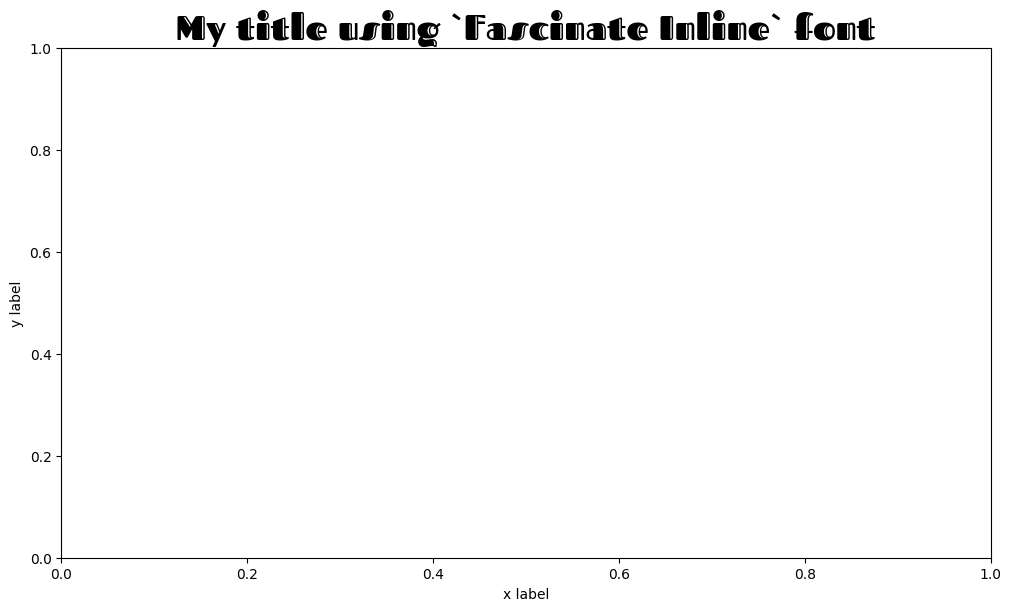

In [22]:
# Reset all previous settings to the defaults
rcdefaults()

fig, ax = plt.subplots(
    figsize=(10, 6),
    layout="constrained"
)

ax.set_title(
    "My title using `Fascinate Inline` font",
    fontname="Fascinate Inline",
    fontsize=25
)

# This still uses default font
ax.set_xlabel("x label")
ax.set_ylabel("y label")

### Way 2: Manually add one of the fonts - DancingScript-Bold

Using `font_manager.FontProperties()`

In [23]:
all_not_installed[1]

'/home/pawjast/Documents/my github/medium-WIP/dev_medium/fonts/Dancing_Script/static/DancingScript-Bold.ttf'

In [24]:
# Add font
font_manager.FontProperties(
    fname=all_not_installed[1]
)

In [25]:
# Check if font is available
"Dancing Script" in font_manager.get_font_names()

True

Text(0, 0.5, 'y label')

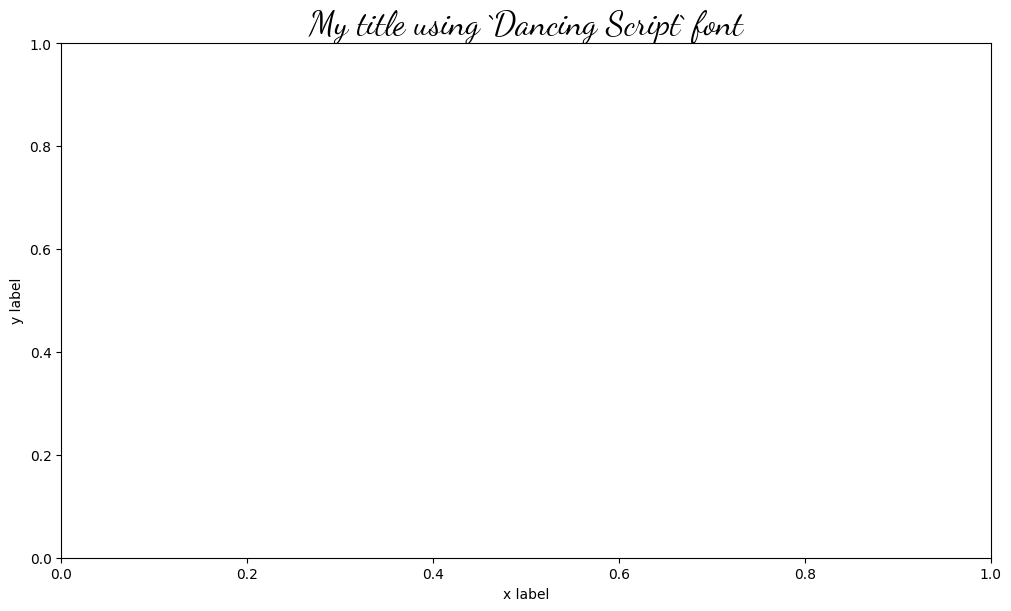

In [26]:
fig, ax = plt.subplots(
    figsize=(10, 6),
    layout="constrained"
)

ax.set_title(
    "My title using `Dancing Script` font",
    fontname="Dancing Script",
    fontsize=25
)

# This still uses default font
ax.set_xlabel("x label")
ax.set_ylabel("y label")

## Recap:

* method to show fonts available in the System
* method to show fonts available to matplotlib
* 2 methods to add fonts to font manager so matplotlib sees them
* you can use installed and not installed font files